# BP3D Dataset EDA
## DSE-260 Group2
### Imports

In [1]:
import bp3d
import numpy as np
import matplotlib.pyplot as plt

### Load Data

In [2]:
c = bp3d.Client(url='https://burnpro3d.sdsc.edu/api')
ens = c.load_ensemble('uniform-pgml-success.bp3d.json')
out = ens.output()

replacing ignite.dat with 131dbf4b-c91e-4d1b-9d86-6399a5cf6883
replacing ignite.dat with 0fde6cd8-eddd-432b-af23-a13f3b7db522
replacing ignite.dat with 54a226df-1fbf-4cce-abe5-ceb4159cb37a
replacing ignite.dat with 079c0597-e8a5-4e06-bcfd-2d8c23946a5f
replacing ignite.dat with 92f12548-2416-4f18-9fd9-7fb9c78ceb7d
Save ensemble to replace ignition file contents with new ids.


In [3]:
# %%time

# fuel_array=[]
# windu_array=[]
# windv_array=[]
# windw_array=[]
# moisture_array=[]
# for i in range(1):
#     print('Started iteration:', i)
#     fuel_array.append(np.array(out[i].zarr['fuels-dens']))
#     windu_array.append(np.array(out[i].zarr['windu']))
#     windv_array.append(np.array(out[i].zarr['windv']))
#     windw_array.append(np.array(out[i].zarr['windw']))
#     # moisture_array.append(np.array(out[i].zarr['fuels-moisture']))
#     print('Finished iteration:', i)


### Explore Data

In [4]:
# fuel=np.stack(fuel_array,axis=0)
# moisture=np.stack(moisture_array,axis=0)
#windu=np.stack(windu_array,axis=0)
#windv=np.stack(windv_array,axis=0)
#windw=np.stack(windw_array,axis=0)
# np.save("fuel.txt",fuel)
# np.save("moisture.txt,moisture)
#np.save("windu.txt",windu)
#np.save("windv.txt",windu)
#np.save("windw.txt",windw)

In [5]:
# lets look at ensemble # 1 [0]:
out[1].zarr.tree()

Tree(nodes=(Node(disabled=True, name='/', nodes=(Node(disabled=True, icon='table', name='fire-energy_to_atmos …

#### We can see that the ensemble contains 8 arrays of different data:
- Fire Energy to Atmosphere
- Fuel Density
- Fuel Moisture
- Surf Energy
- Topography
- 3 directions of the Wind Speed

In [6]:
# sum([(out[x].zarr.store.getsize()) for x in range(1, len(out))])

In [7]:
# len(out)

In [8]:
# for i in range(1, len(out)):
#     print(out[i].zarr.store.getsize())

### Explore the Topography feature

In [11]:
topography = out[2].zarr['topography']

In [13]:
print('Shape:', topography.shape)

Shape: (300, 300)


In [16]:
topography = np.array(topography)

In [17]:
topography

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float16)

In [18]:
topography.std()

0.0

In [19]:
topography.mean()

0.0

### Explore the Wind feature (one of the dimensions - wind_u)

In [21]:
windu = np.array(out[2].zarr['windu'])

In [22]:
windu

array([[[[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
         ...,
         [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
         [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ]]],


       [[[0.436 , 0.436 , 0.436 , ..., 0.436 , 0.436 , 0.436 ],
         [0.3867, 0.3374, 0.3374, ..., 0.3374, 0.3867, 0.436 ],
         [0.3867, 0.3374, 0.3374, ..., 0.3374, 0.3867, 0.436 ],
         ...,
         [0.3867, 0.3374, 0.3374, ..., 0.3374, 0.3867, 0.436 ],
         [0.3867, 0.3374, 0.3374, ..., 0.3374, 0.3867, 0.436 ],
         [0.436 , 0.436 , 0.436 , ..., 0.436 , 0.436 , 0.436 ]]],


       [[[0.436 , 0.436 , 0.436 , ..., 0.4382, 0.436 , 0.4333],
         [0.3867, 0.3374, 0.3374, ..., 0.3484, 0.3865, 0.424 ],
         [0.3867, 0.3374, 0.3374, ..., 0.35  , 0.3865, 0.422 ],
    

In [23]:
windu.mean()

0.3557

In [30]:
windu[1,:,:,:].std()

0.01056

In [25]:
windu.max()

99.8

In [26]:
windu.min()

-94.2

Text(0, 0.5, 'mean wind speed m/s')

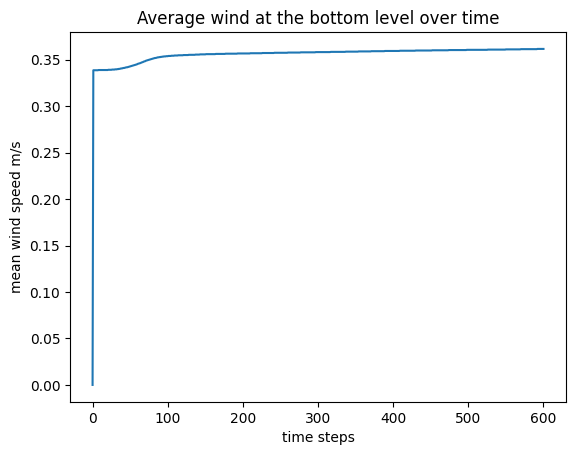

In [37]:
windu_mean_over_time = [ windu[x,0,:,:].mean() for x in range(601)]
time = [x for x in range(601)]
plt.plot(time, windu_mean_over_time)
plt.title('Average wind at the bottom level over time')
plt.xlabel('time steps')
plt.ylabel('mean wind speed m/s')
# windu_mean_over_time

In [ ]:
windu_mean_over_time = [ windu[x,0,:,:].mean() for x in range(601)]
time = [x for x in range(601)]
plt.plot(time, windu_mean_over_time)
plt.title('Average wind at the bottom level over time')
plt.xlabel('time steps')
plt.ylabel('mean wind speed m/s')